# Data Wrangling
Data wrangling is the process of converting raw data into a format that is easier to perform analytics. To illustrate this process, the [Automobile Dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data) would be used.

In [29]:
import pandas as pd 
import requests
from io import StringIO
import os


## Download and Store Data
The data is text on a web page, therefore, before doing any cleaning, we need to download it and store it in a csv file.

In [30]:
def download_and_store(url, directory_path):
    headers = [
        "symboling", "normalized-losses", "make", "fuel-type", "aspiration",
        "num-of-doors", "body-style", "drive-wheels", "engine-location",
        "wheel-base", "length", "width", "height", "curb-weight",
        "engine-type", "num-of-cylinders", "engine-size", "fuel-system",
        "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm",
        "city-mpg", "highway-mpg", "price"
    ]
    
    file_name = 'autocsv.csv'
    full_file_path = os.path.join(directory_path, file_name)

    try:
        # Step 1: Download the data
        response = requests.get(url)
        response.raise_for_status()
        data = response.text
        
        # Step 2: Read the data into a pandas DataFrame
        df = pd.read_csv(StringIO(data), header=None, names=headers, na_values="?")
        
        # Step 3: Ensure the directory exists
        os.makedirs(directory_path, exist_ok=True)
        
        # Step 4: Save the DataFrame to a CSV file
        df.to_csv(full_file_path, index=False)
        
        print(f"Data successfully saved to: {full_file_path}")
        return full_file_path

    except requests.exceptions.RequestException as e:
        print(f'An error occurred while downloading the data: {e}')
        return None
    except Exception as e:
        print(f'An unexpected error occurred: {e}')
        return None


# Call the function to create the file
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
output_path = '../data'
saved_path = download_and_store(url, output_path)
print(saved_path)

Data successfully saved to: ../data/autocsv.csv
../data/autocsv.csv


## Identify and Handle Missing Values
Use `Numpy` to help in this step. Additionally, read the data into the notebook.

In [31]:
import numpy as np

auto_df = pd.read_csv(saved_path)
# Replace ? with NaN
auto_df.replace('?', np.nan, inplace=True)

### Searching for Missing Values
The methods Boolean methods `isnull` and `not_null` shows whether there are missing values or not.

In [32]:
missing_data = auto_df.isnull()
print(missing_data.head(3))

   symboling  normalized-losses   make  fuel-type  aspiration  num-of-doors  \
0      False               True  False      False       False         False   
1      False               True  False      False       False         False   
2      False               True  False      False       False         False   

   body-style  drive-wheels  engine-location  wheel-base  ...  engine-size  \
0       False         False            False       False  ...        False   
1       False         False            False       False  ...        False   
2       False         False            False       False  ...        False   

   fuel-system   bore  stroke  compression-ratio  horsepower  peak-rpm  \
0        False  False   False              False       False     False   
1        False  False   False              False       False     False   
2        False  False   False              False       False     False   

   city-mpg  highway-mpg  price  
0     False        False  False  
1    

In [33]:
# Count the number of missing values in each column
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

symboling
symboling
False    205
Name: count, dtype: int64

normalized-losses
normalized-losses
False    164
True      41
Name: count, dtype: int64

make
make
False    205
Name: count, dtype: int64

fuel-type
fuel-type
False    205
Name: count, dtype: int64

aspiration
aspiration
False    205
Name: count, dtype: int64

num-of-doors
num-of-doors
False    203
True       2
Name: count, dtype: int64

body-style
body-style
False    205
Name: count, dtype: int64

drive-wheels
drive-wheels
False    205
Name: count, dtype: int64

engine-location
engine-location
False    205
Name: count, dtype: int64

wheel-base
wheel-base
False    205
Name: count, dtype: int64

length
length
False    205
Name: count, dtype: int64

width
width
False    205
Name: count, dtype: int64

height
height
False    205
Name: count, dtype: int64

curb-weight
curb-weight
False    205
Name: count, dtype: int64

engine-type
engine-type
False    205
Name: count, dtype: int64

num-of-cylinders
num-of-cylinders
False    205
Nam

Based on the results of the data, some of the columns that contain missing data, can have the missing data replaced with the mean value and categorical data can be replaced with a mode data:
Columns for mean replacement:
- normalised_losses,
- stroke,
- bore, 
- horsepower,
- peak_rpm

The missing value for the num_of_doors column can be replaced with 'four', as its the mode value, while the price, delete the rows with missing data.

In [34]:
# Average calculations
normalized_losses_average = auto_df['normalized-losses'].astype('float').mean()
stroke_avg = auto_df['stroke'].astype('float').mean()
bore_avg = auto_df['bore'].astype('float').mean()
horsepower_avg = auto_df['horsepower'].astype('float').mean()
peakrpm_avg = auto_df['peak-rpm'].astype('float').mean()

print("The average values in the columns: ")
print(f'Normalised Losses: {normalized_losses_average}\nStroke: {stroke_avg}\nBore: {bore_avg}\nHorsepower: {horsepower_avg}\nPeak Rpm: {peakrpm_avg}')

The average values in the columns: 
Normalised Losses: 122.0
Stroke: 3.255422885572139
Bore: 3.3297512437810943
Horsepower: 104.25615763546799
Peak Rpm: 5125.369458128079


In [35]:
# Replace the NaN values with the averages
auto_df['normalized-losses'] = auto_df['normalized-losses'].replace(np.nan, normalized_losses_average)
auto_df['stroke'] = auto_df['stroke'].replace(np.nan, stroke_avg)
auto_df['bore'] = auto_df['bore'].replace(np.nan, bore_avg)
auto_df['horsepower'] = auto_df['horsepower'].replace(np.nan, horsepower_avg)
auto_df['peak-rpm'] = auto_df['peak-rpm'].replace(np.nan, peakrpm_avg)

In [36]:
# Replace NaN in num_of_doors with four
auto_df['num-of-doors'] = auto_df['num-of-doors'].replace(np.nan, 'four')

# Drop all the rows with price colums that are NaN
auto_df = auto_df.dropna(subset=['price'], axis=0)
auto_df.reset_index(inplace=True)

### Ensure the Data are in the Correct format
To check the data type of columns the `dtypes` method is used, while the `astype` meathod is used to change one column format to another.

In [37]:
auto_df.dtypes

index                  int64
symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

Standardisation is the process of transforming data into a single format that for everyone to understand. In the dataset, the miles can be converted to km.

In [38]:
# Convert city-mpg and highway-mpg to km
auto_df['city-L/100km'] = 235 / auto_df['city-mpg']
auto_df['highway-L/100km'] = 235 / auto_df['highway-mpg']
auto_df.head(2)

,index,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,8.703704
1,1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,8.703704


### Data Normalisation
It is the process of transforming data variables into a similar range. It can be achieved by:
- scaling the variable so the variable average is 0
- scaling the variable so the variance is 1
- scaling the variable so the variable values range from 0 to 1

The columns `width`, `length`, and `height1 can be scaled where the values are in a range from 0-1 by dividing the original value by the max value.

In [39]:
auto_df['width'] = auto_df['width'] / auto_df['width'].max()
auto_df['height'] = auto_df['height'] / auto_df['height'].max()
auto_df['length'] = auto_df['length'] / auto_df['length'].max()

print(auto_df[['width', 'height', 'length']].head(2))

      width    height    length
0  0.890278  0.816054  0.811148
1  0.890278  0.816054  0.811148


### Data Bining
Binning is a process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis.

This can be demonstrated with the `horsepower` column by first converting it to int.

Find 3 bins of equal size bandwidth by using Numpy's `linspace(start_value, end_value, numbers_generated function)`.


In [40]:
# convert to int
auto_df['horsepower'] = auto_df['horsepower'].astype('int', copy=True)

# Create the group names and use linspace for the bins
group_names = ['Low', 'Medium', 'High']
bins = np.linspace(min(auto_df['horsepower']), max(auto_df['horsepower']), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [41]:
auto_df['horsepower_binned'] = pd.cut(auto_df['horsepower'], bins, labels=group_names, include_lowest=True)
auto_df[['horsepower', 'horsepower_binned']].head(2)

,horsepower,horsepower_binned
0,111,Low
1,111,Low


In [42]:
bin_counts = auto_df['horsepower_binned'].value_counts()
bin_counts = bin_counts.sort_index()

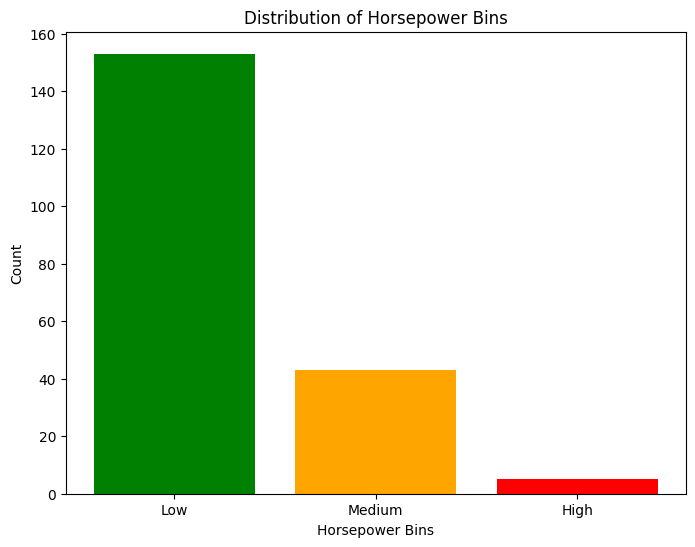

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(bin_counts.index, bin_counts.values, color=['green', 'orange', 'red'])

# Add labels and title
plt.title('Distribution of Horsepower Bins')
plt.xlabel('Horsepower Bins')
plt.ylabel('Count')

plt.show()

### Indicator Variables
An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning. They are important for regression analysis. The method `get_dummies` is used for this process.


In [44]:
dummy_1 = pd.get_dummies(auto_df['fuel-type'])
print(dummy_1.head(2))

   diesel   gas
0   False  True
1   False  True


In [45]:
# Rename the diesel and gas columns
dummy_1.rename(columns={'gas': 'fuel-type-gas', 'diesel': 'fuel-type-diesel'}, inplace=True)
print(dummy_1.head(2))

   fuel-type-diesel  fuel-type-gas
0             False           True
1             False           True


In [46]:
# Merge the new column and drop the original
auto_df = pd.concat([auto_df, dummy_1], axis=1)
auto_df.drop('fuel-type', axis=1, inplace=True)